<a href="https://colab.research.google.com/github/KSrimanNarayana/Data_Visualisation/blob/main/Netflix_BCS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Objective-
#Help Netflix in deciding which type of shows/movies to produce
#and
#how they can grow the business in different countries.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
netflix = pd.read_csv('netflix.csv')

In [ ]:
# constraint = netflix['cast'].apply(lambda x : str(x).split(',')).tolist()
# df_new = pd.DataFrame(constraint,index = netflix['title'])
# df_new.stack()
# df_new = pd.DataFrame(df_new)
# df_new.reset_index(inplace= True)
# df_new = df_new[['title',0]]
# df_new.columns = ['title','cast']
# df_new

In [ ]:
# df_cast = netflix['cast'].str.split(',',expand=True).stack().reset_index(level=1,drop=True).to_frame('cast')
# df_cast['title'] = netflix['title']
# df_cast
# df_country = netflix['country'].str.split(',',expand=True).stack().reset_index(level=1,drop = True).to_frame('country')
# df_country['title'] = netflix['title']
# df_country
# df_director = netflix['director'].str.split(',', expand=True).stack().reset_index(level = 1,drop = True).to_frame('director')
# df_director['title'] = netflix['title']
# df_director.head(15)
#stack(dropna=False)
# df_listed_in = netflix['listed_in'].str.split(',',expand = True).stack().reset_index(level=1,drop=True).to_frame('listed_in')
# df_listed_in['title'] = netflix['title']
# df_listed_in

In [ ]:

netflix.head(5)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
netflix.tail(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [ ]:
netflix.info()
#Datatypes of columns
#['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'rating', 'duration', 'listed_in', 'description'] these are Objects
#'release_year' is integer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
netflix.shape
#shape : Dataset size (rows,columns)
#have 8807 rows 12 columns

(8807, 12)

In [ ]:
#converting date_added column to datetime datatype
netflix['date_added'] = pd.to_datetime(netflix['date_added'])
netflix.info()
# netflix.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [ ]:
#converting type object dtype to category dtype
#improve memory -Converting such a string variable to a categorical variable will save some memory.
netflix['type'] = netflix['type'].astype('category')
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   category      
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: category(1), datetime64[ns](1), int64(1), object(9)
memory usage: 765.7+ KB


In [ ]:
#chacking for missing values/Null/Nan
netflix.isna().sum()
#missing values count in each column
#[director , cast, country, date_added, rating, duration] have missing values.
#['show_id', 'type', 'title', 'release_year', 'listed_in', 'description'] have zero null values.

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
#checking for Duplicate rows
netflix.duplicated().sum()

0

**Handling Missing Values**

In [ ]:
#Rules followed:
#for coulmns like Cast , Director - replacing missing value by Unknown Actor/Director

netflix['cast'].fillna('Unknown Actor',inplace = True)
netflix['director'].fillna('Unknown Director',inplace = True)

#for column like country - replacing missing value by mode(most frequently occuring value)
netflix['country'].fillna(netflix['country'].mode()[0],inplace = True)

#for column like rating - replacing missing value by rating mode of type(TV Show/Movies)  resepectively
movie_mode_rating = netflix.loc[netflix['type']=='TV Show','rating'].mode()[0]
tvshow_mode_rating = netflix.loc[netflix['type']=="Movie",'rating'].mode()[0]
netflix['rating'] = netflix.apply(lambda x : movie_mode_rating if x['type']=='Movie' and pd.isna(x['rating'])
                                    else tvshow_mode_rating if x['type']=="TV Show"  and pd.isna(x['rating'])
                                    else x['rating'],axis=1)

#for column like duration - replacing missing value by mode of duration of type(TV Show/Movie) respectively
movie_mode_duration = netflix.loc[netflix['type']=='Movie','duration'].mode()[0]
tvshow_mode_duration = netflix.loc[netflix['type']=='TV Show','duration'].mode()[0]
netflix['duration'] = netflix.apply(lambda x : movie_mode_duration if x['type']=="Movie" and pd.isna(x['duration'])
                                    else tvshow_mode_duration if x['type']=='TV Show' and pd.isna(x['duration'])
                                    else x['duration'],axis=1)
#for column like date_added - we have 10 missing values in the columns, replacing by average date
netflix['date_added'].fillna(netflix.loc[netflix['type']=="TV Show",'date_added'].mean(),inplace=True)
netflix.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

**Statistical** **Summary**

In [ ]:
netflix.describe(include = 'all')

<ipython-input-15-a433d89631da>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  netflix.describe(include = 'all')


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,8807,8807,8807,8807,8807.000000,8807,8807,8807,8807
unique,8807,2,8807,4529,7693,748,1715,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Unknown Director,Unknown Actor,United States,2020-01-01 00:00:00,NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,2634,825,3649,110,NaN,3211,1793,362,4
first,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-25 00:00:00,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN


**Unnesting the Director, Cast, Country, Listed_in columns in the dataset**

In [ ]:
def unnest(col,netflix):
  df = netflix[col].str.split(',',expand=True).stack().reset_index(level=1,drop=True).to_frame(col)
  df['title'] = netflix['title']
  return df[['title',col]]


In [ ]:
df_cast = unnest('cast',netflix)
df_country = unnest('country',netflix)
df_listed_in = unnest('listed_in',netflix)
df_director = unnest('director',netflix)


**Non-Graphical Analysis & Graphical Analysis::**

In [ ]:
# Non-Graphical Analysis: Value counts and unique attributes
len(netflix['rating'].unique())
# Thier are 17 unique types ratings availble for Shows on Netflix

17

Thier are 17 unique ratings availble for Shows on Netflix

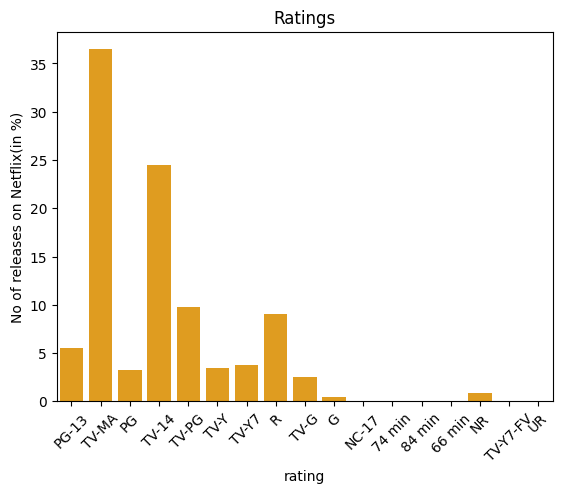

In [ ]:
sns.countplot(x='rating',data=netflix,color='orange',stat='percent')
plt.xticks(rotation=45)
plt.ylabel('No of releases on Netflix(in %)')
plt.title('Ratings')
plt.show()

1)Thier are 17 unique types of ratings are availble for Shows
on Netflix

2)Most releases on Netflix are having ratings of TV-MA
(For Mature Audiences) - 3K+ releases -( > 35% of shows are these kind)

3)then follow by TV-14 - 2K+ releases-( nearly 24% of shows are these kind)

In [ ]:
# netflix.loc[:,['type','rating']].value_counts()

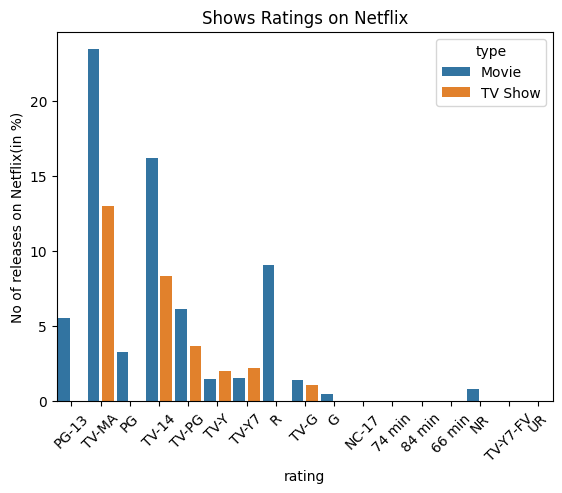

In [ ]:
sns.countplot(x='rating',data=netflix,hue='type',width=1,stat='percent',gap=0.2)
plt.xticks(rotation=45)
plt.ylabel('No of releases on Netflix(in %)')
plt.title('Shows Ratings on Netflix')
plt.show()

Most of the releases in Movies and TV Shows on Netflix are having the rating of TV-MA(For Mature Audiences Adults) with 24% in movie type and nearly 14% in tvshow kind



In [ ]:
df_country['country'] = df_country['country'].str.strip()
print("On Netflix, ",len(df_country['country'].value_counts())," Global Country Shows are produced.")

On Netflix,  123  Global Country Shows are produced.


On Netflix,  123  Global Country Shows are produced.

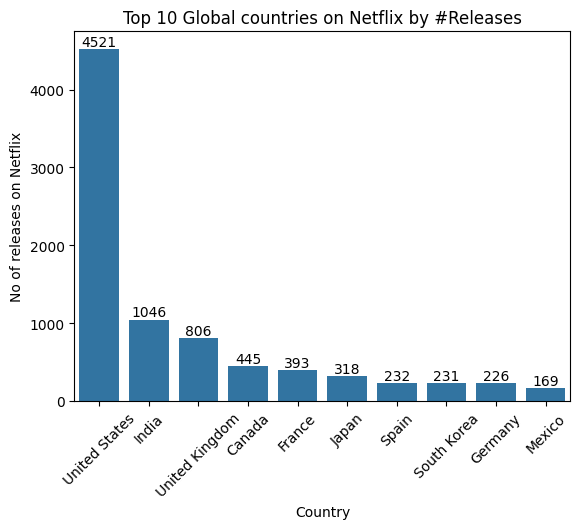

In [ ]:
country_counts = df_country['country'].value_counts()
top_10_country = country_counts.head(10)
bar_plot = sns.barplot(y=top_10_country.values,x=top_10_country.index)
for index, value in enumerate(top_10_country.values):
    bar_plot.text(index, value, str(value), ha='center', va='bottom')
plt.xticks(rotation=45)
plt.ylabel('No of releases on Netflix')
plt.xlabel('Country')
plt.title('Top 10 Global countries on Netflix by #Releases')
plt.show()


Netflix is very popular in United States which have highest no. of releases globaly - 4K+ releases

After US, India is the second highest no of releases on Netflix globaly - 1K+ releases

then follwed by United Kingdom (806 #releases) globaly.

In [ ]:
df_director['director'] = df_director['director'].str.strip()
print('On Netflix ,',len(df_director['director'].value_counts())," Director shows are produced on Global Scale.")

On Netflix , 4994  Director shows are produced on Global Scale.


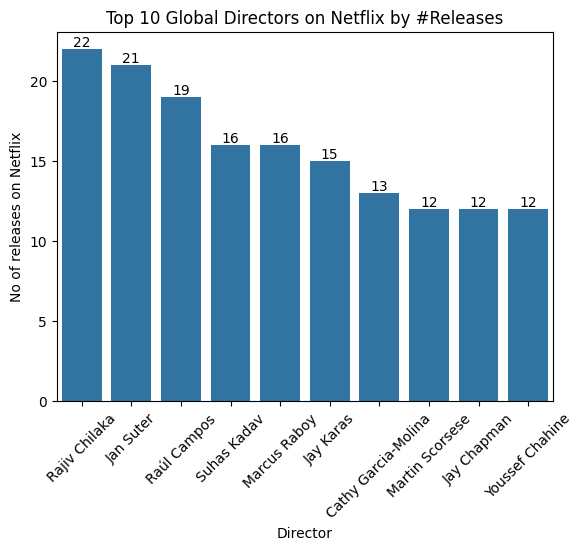

In [ ]:
director_counts = df_director['director'].value_counts()[1:]
top_10_global_director = director_counts.head(10)
bar_plot = sns.barplot(y=top_10_global_director.values,x=top_10_global_director.index)
for index, value in enumerate(top_10_global_director.values):
    bar_plot.text(index, value, str(value), ha='center', va='bottom')
plt.xticks(rotation=45)
plt.ylabel('No of releases on Netflix')
plt.xlabel('Director')
plt.title('Top 10 Global Directors on Netflix by #Releases')
plt.show()

The Above are the top 10 directors on Netflix on Global Scale by TV Show/Movies release count

The top 5 directors in the above criteria are

1)Rajiv Chilaka

2)Jan Suter

3)Raul Campos

4)Suhas Kadav

5)Marcus Raboy


In [ ]:
df_cast['cast'] = df_cast['cast'].str.strip()
cast_counts = df_cast['cast'].value_counts()[1:]

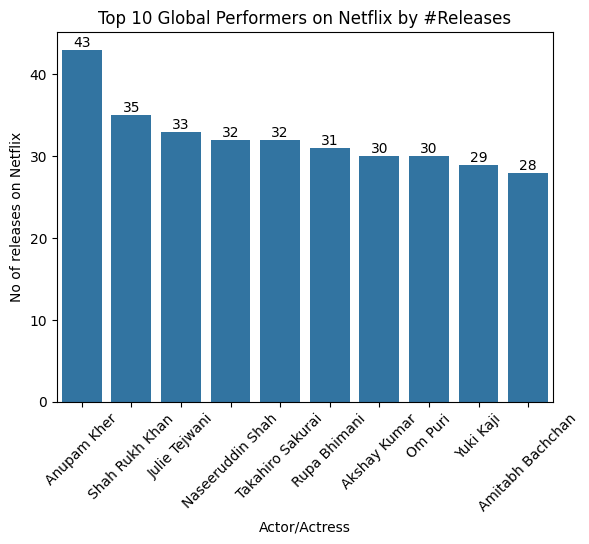

In [ ]:
cast_counts = df_cast['cast'].value_counts()[1:]
top_10_cast = cast_counts.head(10)
bar_plot = sns.barplot(y=top_10_cast.values,x=top_10_cast.index)
for index, value in enumerate(top_10_cast.values):
    bar_plot.text(index, value, str(value), ha='center', va='bottom')
plt.xticks(rotation=45)
plt.ylabel('No of releases on Netflix')
plt.xlabel('Actor/Actress')
plt.title('Top 10 Global Performers on Netflix by #Releases')
plt.show()

The above graph shows popular actor/actress on Netflix who are acted more in no. of TV Shows/Movie on Global Scale.

The top 5 performers on Netflix based on above criteria are:

1)Anupam Kher

2)Shah Rukh Khan

3)Juile Tejwani

4)Naseeruddin Shah

5)Takahiro Sakurai

In [ ]:
df_listed_in['listed_in'] = df_listed_in['listed_in'].str.strip()
# df_listed_in['listed_in'].value_counts()
print("On Netflix, ",len(df_listed_in['listed_in'].unique()),"Genres are availble.")

On Netflix,  42 Genres are availble.


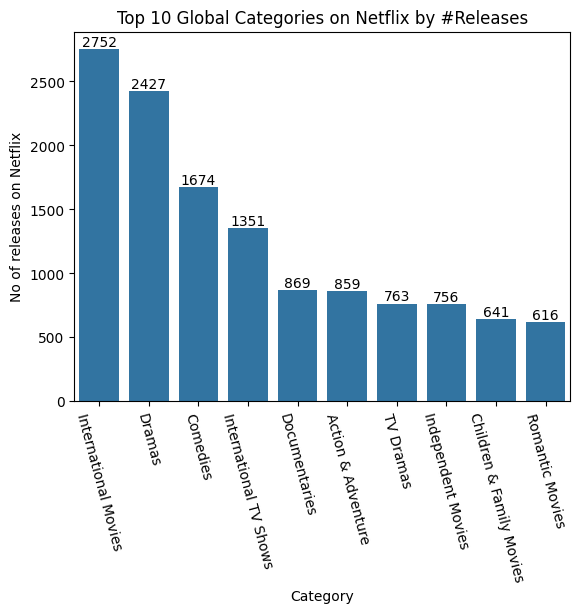

In [ ]:
listedin_counts = df_listed_in['listed_in'].value_counts()
top_10_listedin = listedin_counts.head(10)
bar_plot = sns.barplot(y=top_10_listedin.values,x=top_10_listedin.index)
for index, value in enumerate(top_10_listedin.values):
    bar_plot.text(index, value, str(value), ha='center', va='bottom')
plt.xticks(rotation=285)
plt.ylabel('No of releases on Netflix')
plt.xlabel('Category')
plt.title('Top 10 Global Categories on Netflix by #Releases')
plt.show()

The above graph shows popular categories on Netflix which have most no. of TV Shows/Movie releases on Global Scale.

The top 5 popular categories on Netflix based on above criteria are:

1)International Movies

2) Dramas

3)Comedies

4)International TV Shows

5)Documentries

In [ ]:
#In the given dataset which columns are category or Numerical

#['Show_id', 'type', 'title', 'director', 'cast', 'country', 'rating', 'duration', 'listed_in', 'description']-->  categorical data
#['date_added','release_year'] --> Date columns

In [ ]:
print("The given Netflix dataset is of the period between ",netflix['date_added'].dt.year.min(),"to",netflix['date_added'].dt.year.max())

The given Netflix dataset is of the period between  2008 to 2021


In [ ]:
#dataset contains netflix movies from Jan 1st,2008 - Sept 25th,2021 ~= 13 years data(13 years, 8 months, 25 days)
# netflix['date_added'].min() - netflix['date_added'].max()

In [ ]:
# df = netflix
#add a new column to the DataFrame containing only the month of the measurement
# df['month'] = netflix['date_added'].dt.month
# df[['month','title']].head()
# df.groupby(['month'])['title'].count()

In [ ]:
df = netflix
df['month'] = netflix['date_added'].dt.month
month= df.groupby(['month','type'])['title'].count().reset_index()
month
#movies are added more than TV shows in to netflix each month


,month,type,title
0,1,Movie,546
1,1,TV Show,192
2,2,Movie,382
3,2,TV Show,181
4,3,Movie,529
5,3,TV Show,213
6,4,Movie,550
7,4,TV Show,214
8,5,Movie,439
9,5,TV Show,193


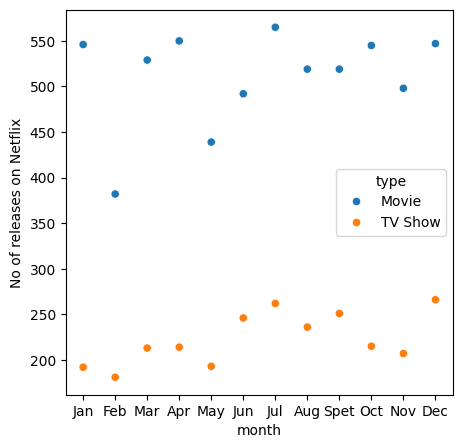

In [ ]:
#ccn
plt.figure(figsize=(5,5))
# sns.barplot(x='type',y='title',hue='month',data=month)
#nnc
sns.scatterplot(x='month',y='title',hue='type',data=month)
plt.ylabel('No of releases on Netflix')

plt.xticks(ticks=[1,2,3,4,5,6,7,8,9,10,11,12],labels=['Jan','Feb','Mar',"Apr",'May','Jun',"Jul",'Aug','Spet','Oct','Nov','Dec'])
plt.show()

no of movies are released more than no of TV shows in to netflix each month.

we see an outlier on febuary month the no of movie releases.

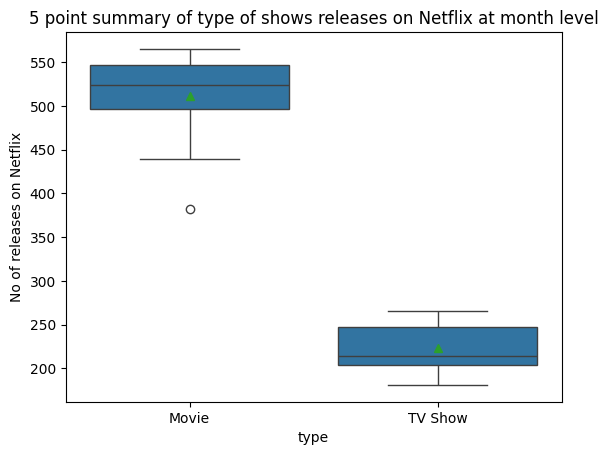

In [ ]:
sns.boxplot(y='title',x='type',data=month,showmeans=True)
plt.title('5 point summary of type of shows releases on Netflix at month level')
plt.ylabel('No of releases on Netflix')
plt.show()

The Average no of movies released on Netflix greater then Average no of TV Shows released on Netflix



In [ ]:
#febuary becomes an outlier in the movies section
#reasons may be no of releases are low in Feb
#avalibility of casts in Feb are not | cast are busy in Feb
#less no of days in Feb

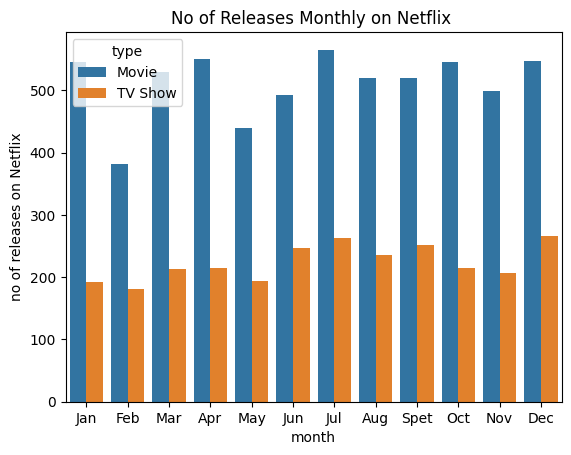

In [ ]:
sns.barplot(x='month',y='title',hue='type',data=month)
plt.ylabel('no of releases on Netflix')
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10,11],labels=['Jan','Feb','Mar',"Apr",'May','Jun',"Jul",'Aug','Spet','Oct','Nov','Dec'])
plt.title('No of Releases Monthly on Netflix ')
plt.show()

The most popular month on Netflix based on release count is July

The top 3 most popular months on Netflix based release count are:

1)July

2)December

3)September

In [ ]:
# Country where the movie/show was produced
df['month'].value_counts()

7     827
12    813
9     770
4     764
10    760
8     755
3     742
6     738
1     738
11    705
5     632
2     563
Name: month, dtype: int64

In [ ]:
#highest no. of movies are added to netflix are in the months of July , December, September respectively in dececresing order
# 1  2  3 - [Jan, March] 738,742 ,feb down 528
# 4  5  6 - [Apr,June] 764,728, may down 632
# 7  8  9 - [July] -827 [Aug,sept] 755,770
# 10 11 12- [December]-813 [oct,nov] 760,705

In [ ]:
df[['month','type']].value_counts()

month  type   
7      Movie      565
4      Movie      550
12     Movie      547
1      Movie      546
10     Movie      545
3      Movie      529
9      Movie      519
8      Movie      519
11     Movie      498
6      Movie      492
5      Movie      439
2      Movie      382
12     TV Show    266
7      TV Show    262
9      TV Show    251
6      TV Show    246
8      TV Show    236
10     TV Show    215
4      TV Show    214
3      TV Show    213
11     TV Show    207
5      TV Show    193
1      TV Show    192
2      TV Show    181
dtype: int64

In [ ]:
netflix['date_added'].dt.weekday.value_counts()
#week with Monday=0, Sunday=6
# 0 - Mon
# 1 - Tue
# 2 - Wed
# 3 - Thu
# 4 - Fri
# 5 - Sat
# 6 - Sun

4    2498
3    1396
2    1288
1    1197
0     851
5     816
6     761
Name: date_added, dtype: int64

In [ ]:
#the movies/shows are realeased into netflix are more in weekdays then weekends
#Highest no of release being on Friday followed by Thrusday and lowest no of releases on sunday followed by saturday
#friday hits no of releases then rest of weekdays with more no of releases in both types Movies and TVShows
#On netflix in movies least releasing weekday is on Saturday and sunday
#On netflix in TV Shows least releasing weekday is on sunday and monday
"""
type     weekday    no of releases in netflix
Movie    4.0        1566
         3.0        1053
TV Show  4.0         932
Movie    2.0         906
         1.0         852
         0.0         628
         6.0         569
         5.0         557
TV Show  2.0         382
         1.0         345
         3.0         343
         5.0         259
         0.0         223
         6.0         182
"""

'\ntype     weekday    no of releases in netflix\nMovie    4.0        1566\n         3.0        1053\nTV Show  4.0         932\nMovie    2.0         906\n         1.0         852\n         0.0         628\n         6.0         569\n         5.0         557\nTV Show  2.0         382\n         1.0         345\n         3.0         343\n         5.0         259\n         0.0         223\n         6.0         182\n'

In [ ]:
#adding a new column weekday
netflix['weekday'] = netflix['date_added'].dt.weekday
weekday = netflix.groupby(['type','weekday'])['title'].count().reset_index()
weekday

,type,weekday,title
0,Movie,0,628
1,Movie,1,852
2,Movie,2,906
3,Movie,3,1053
4,Movie,4,1566
5,Movie,5,557
6,Movie,6,569
7,TV Show,0,223
8,TV Show,1,345
9,TV Show,2,382


In [ ]:
netflix[['type','weekday']].value_counts()

type     weekday
Movie    4          1566
         3          1053
TV Show  4           932
Movie    2           906
         1           852
         0           628
         6           569
         5           557
TV Show  2           382
         1           345
         3           343
         5           259
         0           223
         6           192
dtype: int64

In [ ]:
#NCC
# sns.boxplot(hue='weekday',y='title',x='type',data=weekday)
# sns.scatterplot(x='weekday',hue='title',y='type',data=weekday)

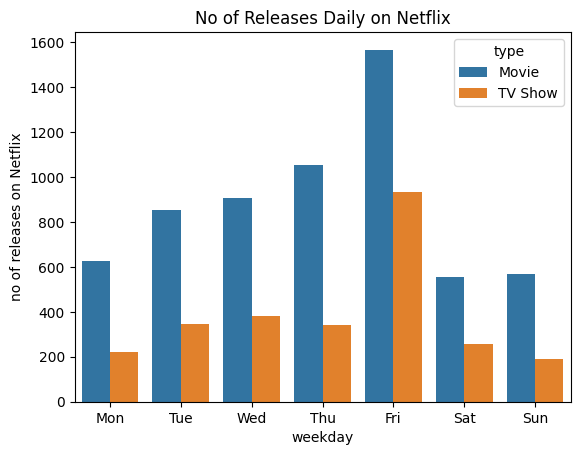

In [ ]:
#cnc
sns.barplot(x='weekday',y='title',hue='type',data=weekday)
plt.ylabel('no of releases on Netflix')
plt.title('No of Releases Daily on Netflix')
plt.xticks(ticks=[0,1,2,3,4,5,6],labels=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.show()

The Most Popular Day on Netflix based on release count is Friday

The Top 3 Most Popular Day on Netflix based on release count are:

1)Friday

2)Thursday

3)Wednesday

The bottom 2 least popular Day on Netflix based on release count are:

1)Sunday

2)Saturday

In [ ]:
#friday hits no of releases then rest of weekdays with more no of releases in both types Movies and TVShows
#On netflix in movies least releasing weekday is on Saturday and sunday
#On netflix in TV Shows least releasing weekday is on sunday and monday

In [ ]:
df = netflix
df['year']= netflix['date_added'].dt.year
year = df.groupby(['year','type'])['title'].count().sort_values(ascending=False).reset_index()
year

,year,type,title
0,2019,Movie,1424
1,2020,Movie,1284
2,2018,Movie,1237
3,2021,Movie,993
4,2017,Movie,839
5,2019,TV Show,602
6,2020,TV Show,595
7,2021,TV Show,505
8,2018,TV Show,412
9,2017,TV Show,349


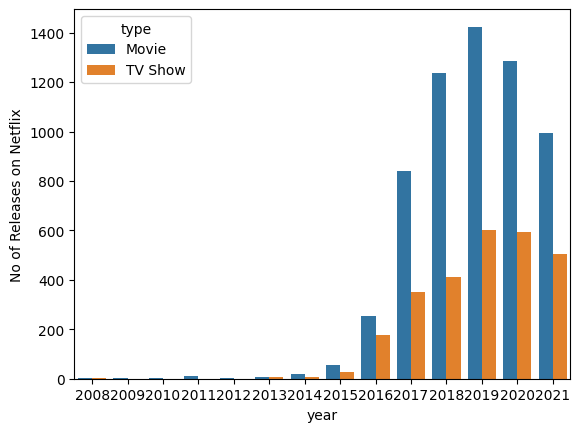

In [ ]:
#NNC
sns.barplot(x='year',y='title',hue='type',data=year)
plt.ylabel('No of Releases on Netflix')
plt.show()

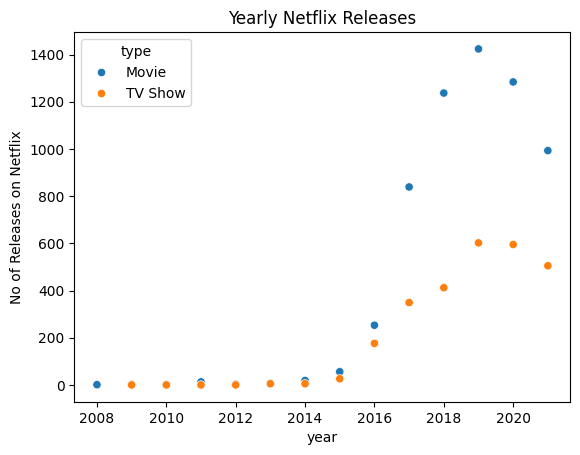

In [ ]:
sns.scatterplot(x='year',y='title',hue='type',data=year)
plt.ylabel('No of Releases on Netflix')
plt.title('Yearly Netflix Releases')
plt.show()

The above graph shows us after 2014 the Netflix is actively releasing more no. of movie and tv shows.

We can see movies/tvshows are increasing over the years and during covid the values are decresing.

**Merging unnest country,unnest listed_in df's**

In [ ]:
df_GC =df_country.merge(df_listed_in,on='title')
df_GCT = df_GC.merge(netflix[['title','type']],on='title')
df_GCT

,title,country,listed_in,type
0,Dick Johnson Is Dead,United States,Documentaries,Movie
1,Blood & Water,South Africa,International TV Shows,TV Show
2,Blood & Water,South Africa,TV Dramas,TV Show
3,Blood & Water,South Africa,TV Mysteries,TV Show
4,Ganglands,United States,Crime TV Shows,TV Show
...,...,...,...,...
23759,Zoom,United States,Children & Family Movies,Movie
23760,Zoom,United States,Comedies,Movie
23761,Zubaan,India,Dramas,Movie
23762,Zubaan,India,International Movies,Movie


In [ ]:
#country-Type-Genres df
CTG = df_GCT.groupby(['country','type','listed_in'])['title'].count().sort_values(ascending=False).reset_index()

#country-Type-Genres for movies on netflix df
CTGM = CTG.loc[CTG['type']=='Movie']

#country-Type-Genres for tvshow on netflix df
CTGTS = CTG.loc[CTG['type']=='TV Show']



In [ ]:
#country-Type-Genres for movies on netflix
CTGM.head()

,country,type,listed_in,title
0,United States,Movie,Dramas,945
1,India,Movie,International Movies,864
2,United States,Movie,Comedies,774
3,India,Movie,Dramas,662
4,United States,Movie,Documentaries,587


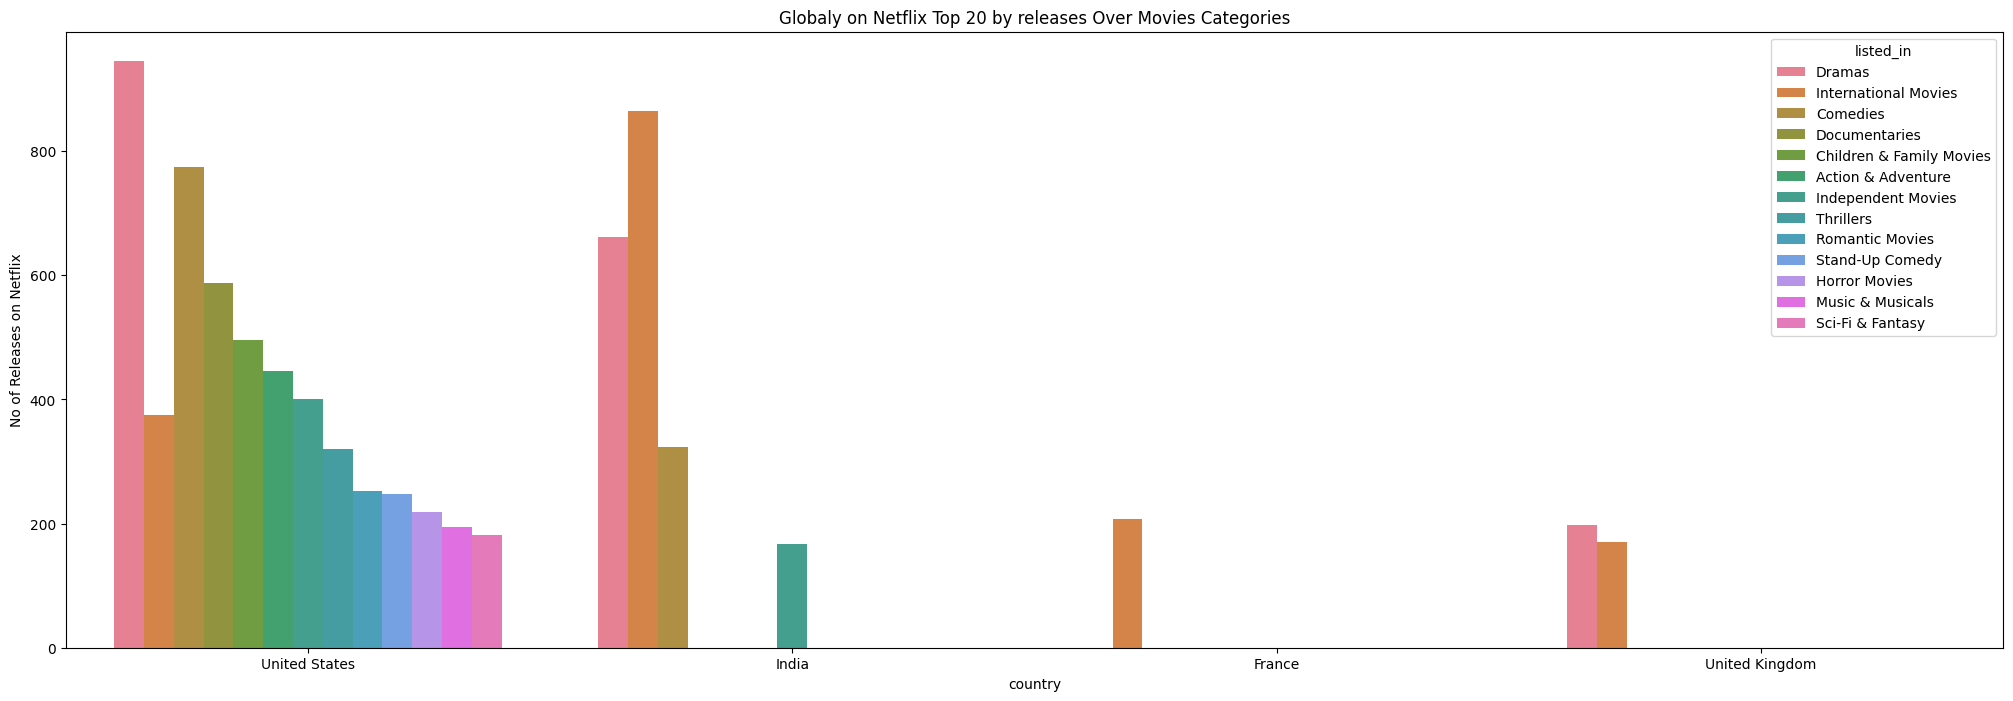

In [ ]:
#C-T
top_CTGM = CTGM.head(20)
plt.figure(figsize=(25,8))
sns.barplot(x='country',y='title',hue='listed_in',data=top_CTGM)
plt.ylabel('No of Releases on Netflix')
plt.title('Globaly on Netflix Top 20 by releases Over Movies Categories')
plt.show()

In [ ]:
us = CTGM.loc[CTGM['country']=='United States']
india = CTGM.loc[CTGM['country']=='India']
uk = CTGM.loc[CTGM['country']=='United Kingdom']
france = CTGM.loc[CTGM['country']=='France']

In [ ]:
def top(df,country,top,type):
  top_country = df.head(top)
  sns.barplot(x='country',y='title',hue='listed_in',data=top_country)
  plt.ylabel('No of Releases on Netflix')
  plt.xlabel('')
  plt.title('Top {} Netflix {} by #releases Over {} Categories'.format(top,country,type))
  plt.show()


In [ ]:
def bottom(df,country,bottom,type):
  bottom_country = df.tail(bottom)
  sns.barplot(x='country',y='title',hue='listed_in',data=bottom_country)
  plt.ylabel('No of Releases on Netflix')
  plt.xlabel('')
  plt.title('Bottom {} Netflix {} by #releases Over {} Categories'.format(bottom,country,type))
  plt.show()


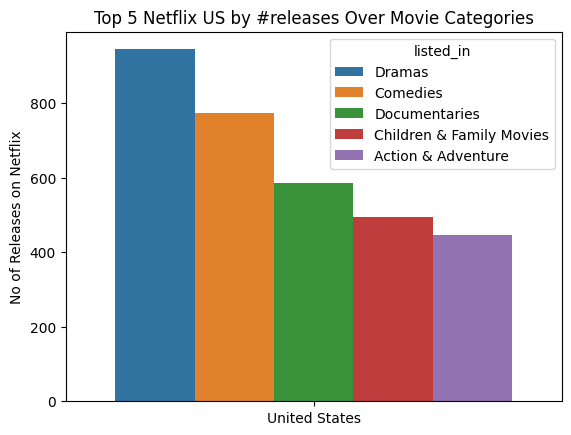

In [ ]:
top(us,'US',5,'Movie')

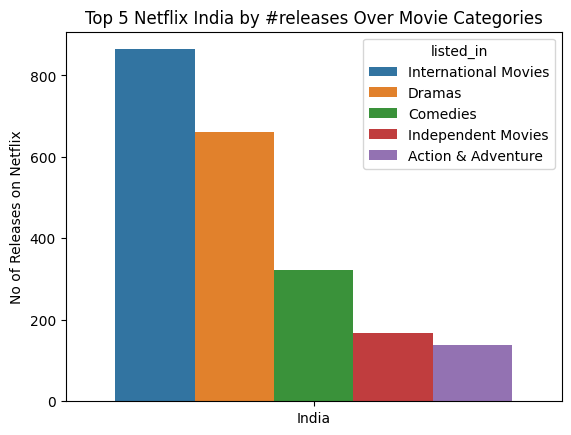

In [ ]:
top(india,'India',5,'Movie')

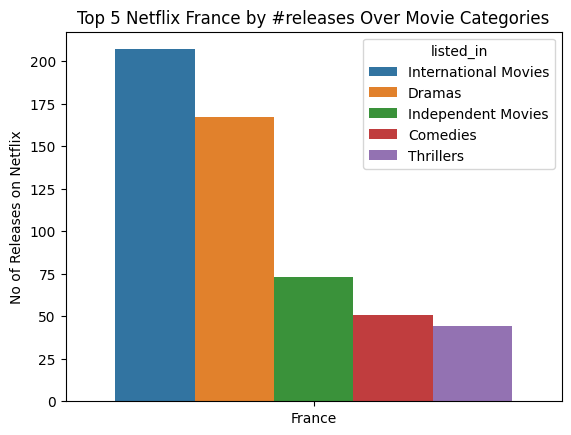

In [ ]:
top(france,'France',5,'Movie')

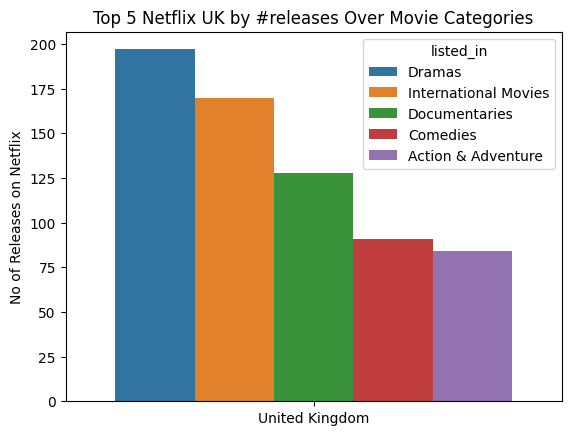

In [ ]:
top(uk,'UK',5,'Movie')

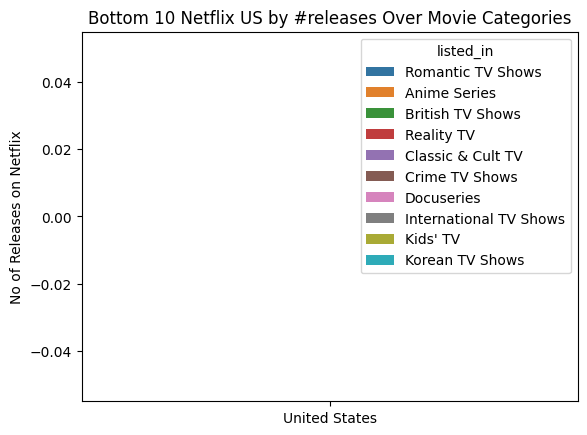

In [ ]:
bottom(us,'US',10,'Movie')

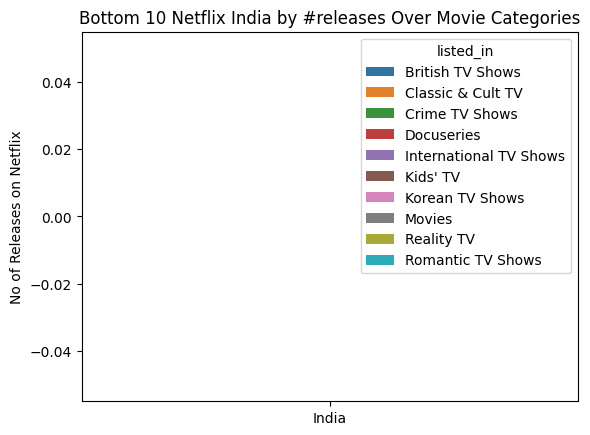

In [ ]:
bottom(india,'India',10,'Movie')

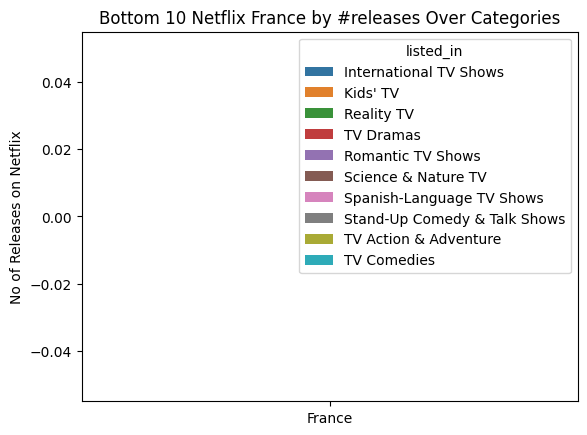

In [ ]:
bottom(france,'France',10,'Movie')

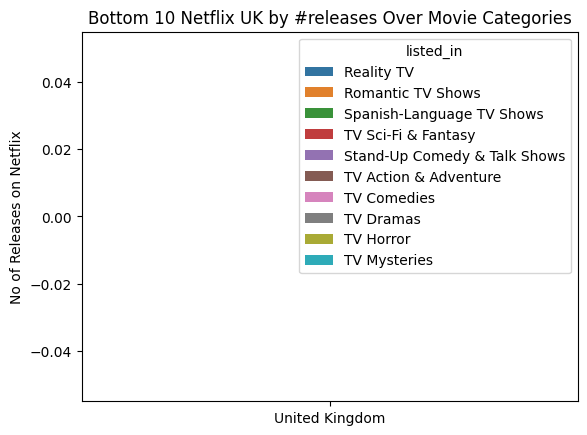

In [ ]:
bottom(uk,'UK',10,'Movie')

In [ ]:
us_tv = CTGTS.loc[CTGTS['country']=='United States']
india_tv = CTGTS.loc[CTGTS['country']=='India']
uk_tv = CTGTS.loc[CTGTS['country']=='United Kingdom']
france_tv = CTGTS.loc[CTGTS['country']=='France']

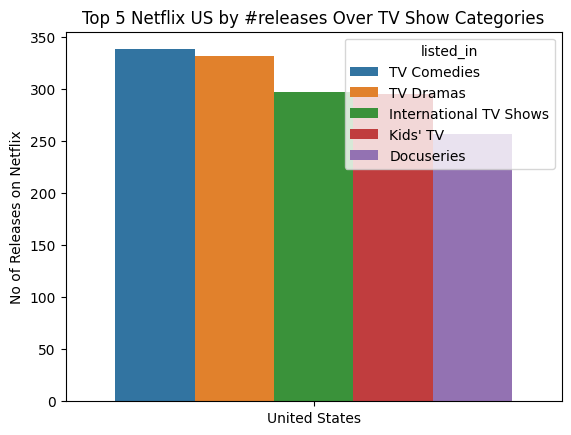

In [ ]:
top(us_tv,'US',5,'TV Show')

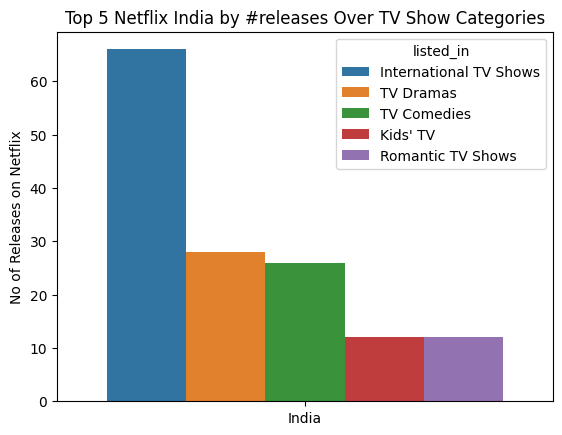

In [ ]:
top(india_tv,'India',5,'TV Show')

In [ ]:
CTGTS.head()

,country,type,listed_in,title
9,United States,TV Show,TV Comedies,338
10,United States,TV Show,TV Dramas,332
13,United States,TV Show,International TV Shows,297
14,United States,TV Show,Kids' TV,295
15,United States,TV Show,Docuseries,257


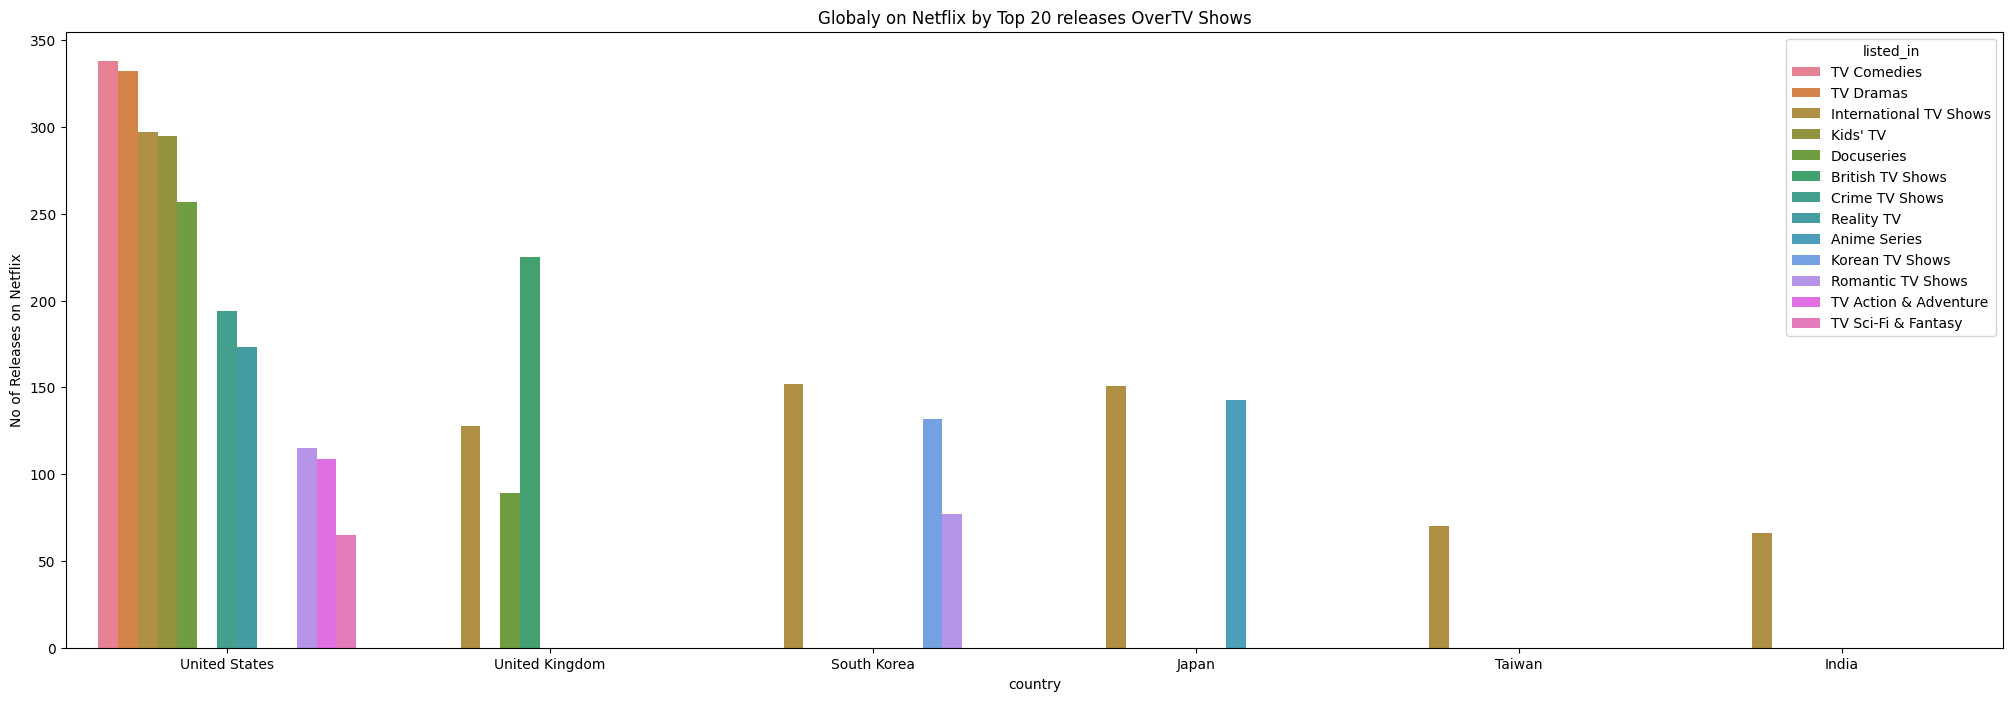

In [ ]:
top_CTGTV = CTGTS.head(20)
plt.figure(figsize=(25,8))
sns.barplot(x='country',y='title',hue='listed_in',data=top_CTGTV)
plt.ylabel('No of Releases on Netflix')
plt.title('Globaly on Netflix by Top 20 releases OverTV Shows')
plt.show()

**Merging unnest Director and unnest Cast DF'S**

In [ ]:
DCA = df_director.merge(df_cast,on='title')
DCA = DCA[(DCA['director']!='Unknown Director') & (DCA['cast']!='Unknown Actor')]
DCA

,title,director,cast
20,Ganglands,Julien Leclercq,Sami Bouajila
21,Ganglands,Julien Leclercq,Tracy Gotoas
22,Ganglands,Julien Leclercq,Samuel Jouy
23,Ganglands,Julien Leclercq,Nabiha Akkari
24,Ganglands,Julien Leclercq,Sofia Lesaffre
...,...,...,...
70807,Zubaan,Mozez Singh,Manish Chaudhary
70808,Zubaan,Mozez Singh,Meghna Malik
70809,Zubaan,Mozez Singh,Malkeet Rauni
70810,Zubaan,Mozez Singh,Anita Shabdish


In [ ]:
#Director - Cast pair by # Relesaes
DCpair = DCA.groupby(['director','cast'])['title'].count().sort_values(ascending=False).reset_index()
DCpair

,director,cast,title
0,Rajiv Chilaka,Rajesh Kava,19
1,Rajiv Chilaka,Julie Tejwani,19
2,Rajiv Chilaka,Rupa Bhimani,18
3,Rajiv Chilaka,Jigna Bhardwaj,18
4,Rajiv Chilaka,Vatsal Dubey,16
...,...,...,...
48181,Huang Jianming,Anthony Padilla,1
48182,Huang Jianming,Chevy Chase,1
48183,Huang Jianming,Ian Hecox,1
48184,Huang Jianming,Jenn McAllister,1


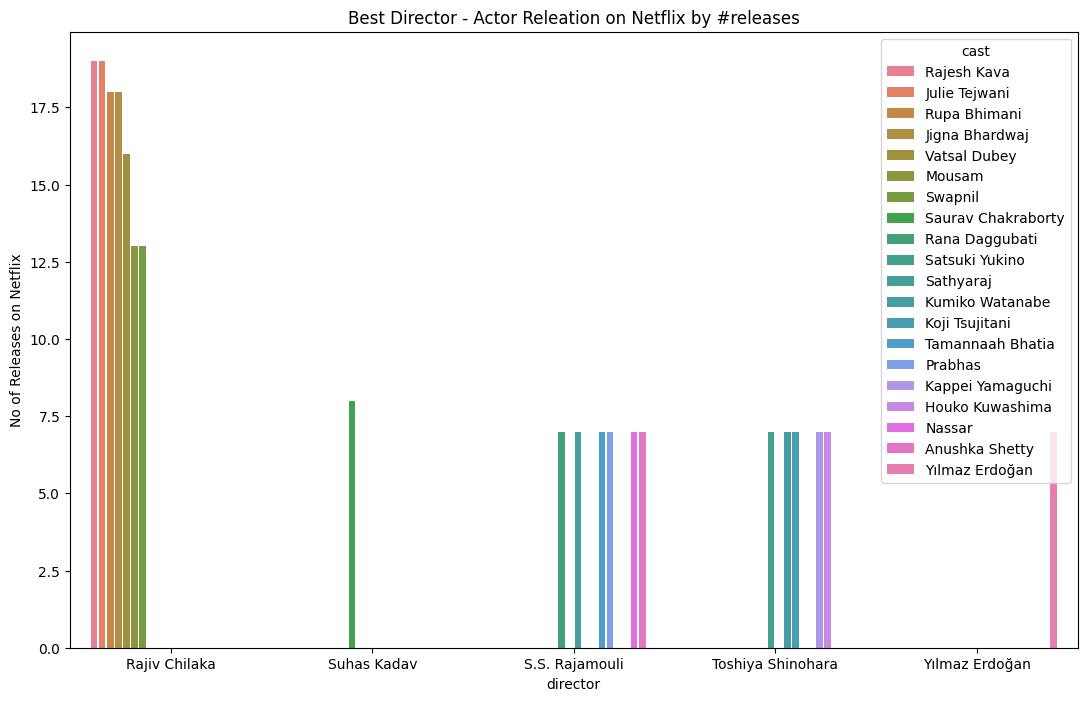

In [ ]:
top_10_DCpair = DCpair.head(20)
plt.figure(figsize=(13,8))
sns.barplot(x='director',y='title',hue ='cast',data=top_10_DCpair,gap=0.2)
plt.ylabel('No of Releases on Netflix')
plt.title('Best Director - Actor Releation on Netflix by #releases')
plt.show()

Top colabration together between director and cast on netflix by top 20 in #releases are:

1)Director - Cast :

Rajiv Chilaka	->(Rajesh Kava,Julie Tejwani,Rupa Bhimani,Jigna Bhardwaj,VatsalDubey)

S.S. Rajamouli ->(Rana Dagubati,Prabhas,Nassar,Tamannah,Satya Raj)

Recomendation:

1) Recommened popular time/day to release TVshow /Movie is Friday

2) Recommened popular month to release TV/Movie is July,follwed by December

3) Recommened future  colabration - for director and actor
Rajiv Chilaka	->(Rajesh Kava,Julie Tejwani,Rupa Bhimani,Jigna Bhardwaj,VatsalDubey)

S.S. Rajamouli ->(Rana Dagubati,Prabhas,Nassar,Tamannah,Satya Raj)

4) Recomended content for US in movies are in Drame,Comedy , Documentries and in TV shows  are TV Comedy,TV Drama